In [2]:
import numpy as np
import matplotlib.pyplot as plt
import platform
import pandas as pd

In [65]:
n = 15000
t_final = 50
dt = t_final / n
#
#  Initial conditions.
#
t = np.linspace ( 0.0, t_final, n + 1 )

x = np.zeros ( n + 1 )
y = np.zeros ( n + 1 )
z = np.zeros ( n + 1 )
w = np.zeros ( n + 1 )
k = np.zeros ( n + 1 )
m = np.zeros ( n + 1 )

x[0] = 0.0 #Q11
y[0] = 0.0 #Q12
z[0] = 0.0 #Q13
w[0] = 0.0 #Q22
k[0] = 0.0 #Q23
m[0] = 0.0 #Q33

SHEAR1 = 0.4*(0.138 * np.sin(0.5*t) + 0.138*np.cos(0.5*t))
SHEAR2 = 0.4*(0.227 * np.sin(0.5*t) + 0.232*np.cos(0.5*t))
SHEAR3 = 0.4*(0.0909 * np.sin(0.5*t) + 0.0778*np.cos(0.5*t))
SHEAR4 = 0.4*(0.0779 * np.sin(0.5*t) + 0.05*np.cos(0.5*t))
SHEAR5 = 0.4*(0.0477 * np.sin(0.5*t) + 0.0648*np.cos(0.5*t))

SHEAR02 = 0.4*(0.0589)*np.sin(0.5*t) + 0.0845*np.cos(0.5*t)
#SHEAR05 = 0.4*(0.114 * np.sin(0.5*t) + 0.15*np.cos(0.5*t))

In [74]:
beta = 190
phi = 0.002
Dea = 1
xi = 1
Wi = 0.2
De = 0.5
lamb = 2
eta = 0.01

In [75]:
    def rk4vec ( t0, m, u0, dt, f ):
        f0 = f ( t0, m, u0 )
        t1 = t0 + dt / 2.0
        u1 = u0 + dt * f0 / 2.0
        f1 = f ( t1, m, u1 )

        t2 = t0 + dt / 2.0
        u2 = u0 + dt * f1 / 2.0
        f2 = f ( t2, m, u2 )
    
        t3 = t0 + dt
        u3 = u0 + dt * f2
        f3 = f ( t1, m, u1 )

        u = u0 + dt * ( f0 + 2.0 * f1 + 2.0 * f2 + f3 ) / 6.0

        return u
    
    def lorenz_rhs ( t, m, xyz ):
    
        dxdt = np.zeros ( 6 )

        dxdt[0] = beta * phi * (- Dea*xyz[0] + 2 * xi * Wi * np.cos(De * t) * xyz[1])                                    #q11
        dxdt[1] = beta * phi * (- Dea*xyz[1] + (xi* xyz[0] + lamb/2) * Wi * np.cos(De * t))  + (2* eta * Wi* np.cos(De * t)) #q12
        dxdt[2] = beta * phi * (- Dea*xyz[2] + (xi - 1) * Wi * np.cos(De * t) * xyz[4])                                       #q13
        dxdt[3] = beta * phi * (- Dea* xyz[3] + 2 * xi * Wi * np.cos(De * t) * xyz[1])                            #q22
        dxdt[4] = beta * phi * (- Dea* xyz[4] + xi * Wi * np.cos(De * t) * xyz[2])                            #q23
        dxdt[5] = beta * phi * (- Dea* xyz[5])                             #q33

    # Q11 - 0, Q12 - 1, Q13 - 2, Q22 - 3, Q23 - 4, Q33 - 5
        return dxdt

In [76]:
for j in range ( 0, n ):

                    xyz = np.array ( [ x[j], y[j], z[j], w[j] , k[j] , m[j]  ] )
                    xyz = rk4vec ( t[j], 3, xyz, dt, lorenz_rhs )
    
 #   xyz2 = np.array ( [ x2[j], y2[j], z2[j], w2[j] , k2[j] , m2[j]  ] )
 #   xyz2 = rk4vec ( t[j], 3, xyz2, dt, lorenz_rhs2 )

                    x[j+1] = xyz[0]
                    y[j+1] = xyz[1]
                    z[j+1] = xyz[2]
                    w[j+1] = xyz[3]
                    k[j+1] = xyz[4]
                    m[j+1] = xyz[5]


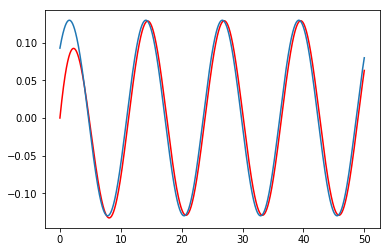

In [77]:
plt.plot(t,y,color='r')
plt.plot(t,SHEAR2)

In [79]:
np.savetxt('y001.out',y,fmt='%.18e', delimiter=' ')
np.savetxt('SHEAR1.out',SHEAR2,fmt='%.18e', delimiter=' ')
np.savetxt('t.out',t,fmt='%.18e', delimiter=' ')


/home/sarinha/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  # Remove the CWD from sys.path while we load stuff.


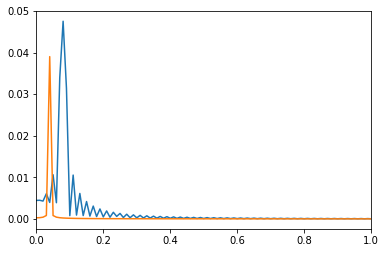

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
N = 30000
# sample spacing
fa = 1/(t[1] - t[0])
T = 1.0 / fa
yf = scipy.fftpack.dct(y)
yff = scipy.fftpack.fft(SHEAR1)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
ax.plot(xf, 2.0/N * np.abs(yff[:N//2]))
plt.xlim([0,1])
plt.show()

In [39]:
max(2.0/N * np.abs(yf))

0.04752586998384539